<a href="https://colab.research.google.com/github/angelohafner/linguagem-de-programacao-udesc/blob/main/tutorial_contour_quiver_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib Tutorial: Contour, Quiver, and 3D Plots

This notebook introduces how to create **contour** and **filled contour** plots, **vector fields (quiver)**, and **3D** plots using `matplotlib`. It includes worked examples and practice exercises at the end.

**Requirements**: `numpy`, `matplotlib`

**Objectives**:
- Build grids with `numpy.meshgrid` and evaluate scalar/vector fields
- Draw `contour` and `contourf` with levels, labels, and colorbars
- Plot vector fields with `quiver` and control arrow scaling
- Create surface, wireframe, and 3D scatter plots with `Axes3D`

---

## Setup

In [1]:
# Imports and default settings
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401  # needed for 3D

# Make reproducible
np.random.seed(42)

# Utility: show figures inline (Jupyter/Colab)
%matplotlib inline


## 1) Contour and Filled Contour
We start with a simple scalar field $z(x,y) = \sin(x)\cos(y)$. We will draw contour lines (`plt.contour`) and filled contours (`plt.contourf`).

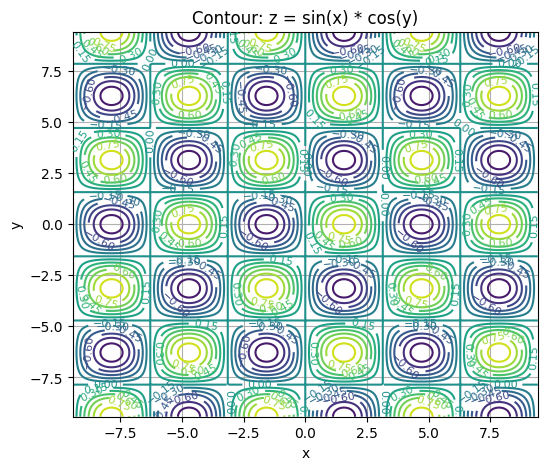

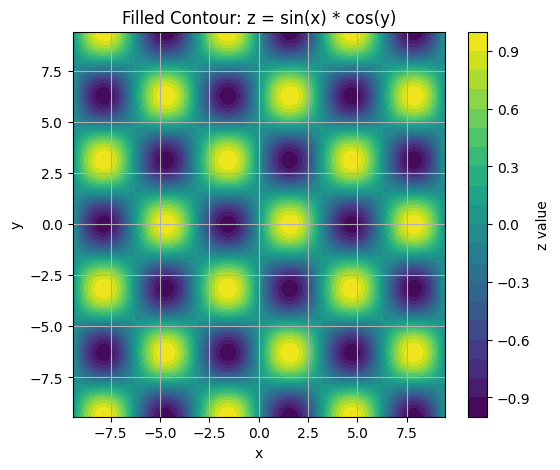

In [2]:
# Create grid and scalar field
# All comments in English as requested
nx = 200
ny = 200
x = np.linspace(-3*np.pi, 3*np.pi, nx)
y = np.linspace(-3*np.pi, 3*np.pi, ny)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.cos(Y)

# Contour lines
plt.figure(figsize=(6, 5))
cs = plt.contour(X, Y, Z, levels=15)
plt.clabel(cs, inline=True, fontsize=8)
plt.title('Contour: z = sin(x) * cos(y)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

# Filled contours
plt.figure(figsize=(6, 5))
cf = plt.contourf(X, Y, Z, levels=20)
plt.colorbar(cf, label='z value')
plt.title('Filled Contour: z = sin(x) * cos(y)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

## 2) Vector Fields (Quiver)
Consider the 2D vector field $\mathbf{F}(x,y) = (-y, x)$, which represents rotation around the origin. We will sample the field on a coarse grid to avoid overcrowding the arrows.

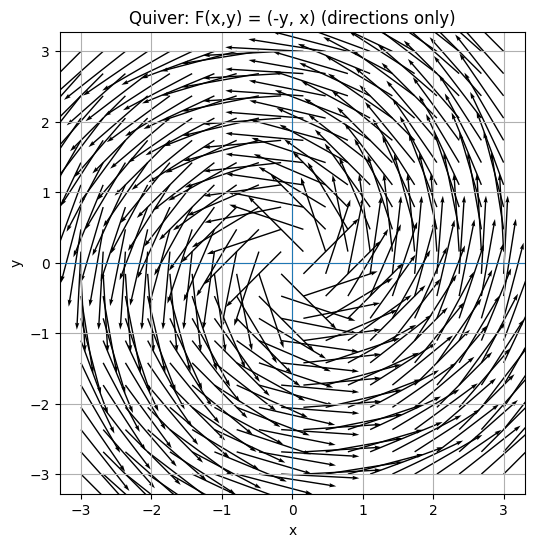

In [3]:
# Build a coarse grid for quiver
n = 20
xq = np.linspace(-3, 3, n)
yq = np.linspace(-3, 3, n)
Xq, Yq = np.meshgrid(xq, yq)

# Define the vector field F = (-y, x)
U = -Yq
V = Xq

# Optional: normalize arrows to focus on directions
mag = np.sqrt(U*U + V*V)
mag[mag == 0] = 1.0
U_dir = U / mag
V_dir = V / mag

plt.figure(figsize=(6, 6))
plt.quiver(Xq, Yq, U_dir, V_dir, angles='xy', scale_units='xy', scale=0.9)
plt.axhline(0, linewidth=0.8)
plt.axvline(0, linewidth=0.8)
plt.title('Quiver: F(x,y) = (-y, x) (directions only)')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid(True)
plt.show()

## 3) 3D Plots
We will draw a 3D surface and a wireframe. For the surface, use $z = \frac{\sin(r)}{r}$ with $r = \sqrt{x^2 + y^2}$ (define $z=1$ at $r=0$).

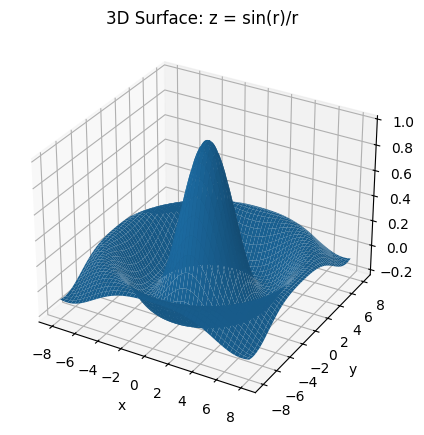

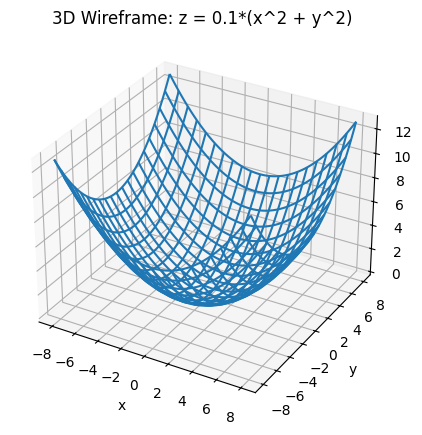

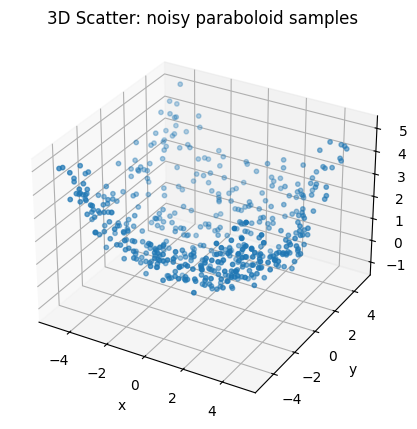

In [4]:
# 3D surface: z = sin(r)/r
xs = np.linspace(-8, 8, 200)
ys = np.linspace(-8, 8, 200)
XS, YS = np.meshgrid(xs, ys)
R = np.sqrt(XS*XS + YS*YS)
Zs = np.sin(R)
Zs[R != 0] = Zs[R != 0] / R[R != 0]
Zs[R == 0] = 1.0

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(XS, YS, Zs)
ax.set_title('3D Surface: z = sin(r)/r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

# Wireframe: paraboloid z = 0.1*(x^2 + y^2)
Zw = 0.1 * (XS*XS + YS*YS)
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(XS, YS, Zw, rstride=10, cstride=10)
ax.set_title('3D Wireframe: z = 0.1*(x^2 + y^2)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

# 3D scatter: sample noisy points on the paraboloid
num = 500
xrand = np.random.uniform(-5, 5, num)
yrand = np.random.uniform(-5, 5, num)
zrand = 0.1*(xrand*xrand + yrand*yrand) + 0.5*np.random.randn(num)

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xrand, yrand, zrand, s=10)
ax.set_title('3D Scatter: noisy paraboloid samples')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

## 4) Combined: Contour + Quiver
Overlay a vector field on a filled contour of a scalar field. Here, use the potential $\phi(x,y)=\sin(x)\cos(y)$ and plot the gradient as arrows.

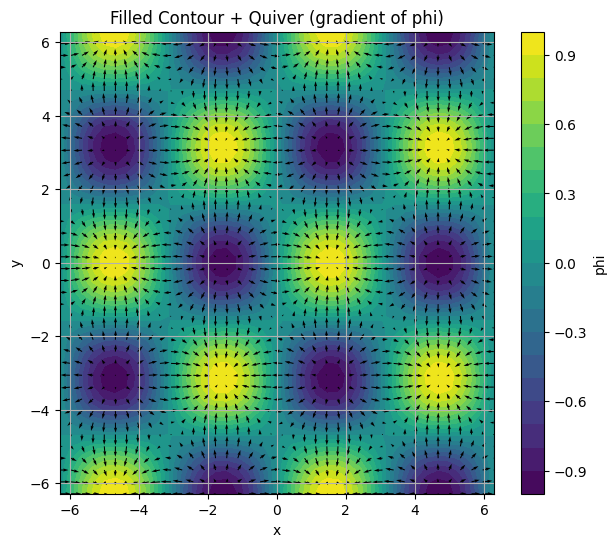

In [5]:
# Scalar potential and its gradient (vector field)
nx = 40
ny = 40
xg = np.linspace(-2*np.pi, 2*np.pi, nx)
yg = np.linspace(-2*np.pi, 2*np.pi, ny)
Xg, Yg = np.meshgrid(xg, yg)
phi = np.sin(Xg) * np.cos(Yg)

# Gradient components: dphi/dx = cos(x)cos(y), dphi/dy = -sin(x)sin(y)
U = np.cos(Xg) * np.cos(Yg)
V = -np.sin(Xg) * np.sin(Yg)

plt.figure(figsize=(7, 6))
cf = plt.contourf(Xg, Yg, phi, levels=20)
plt.colorbar(cf, label='phi')
plt.quiver(Xg, Yg, U, V, scale=40)
plt.title('Filled Contour + Quiver (gradient of phi)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

---
## Exercises
1. **Contour levels**: For $z(x,y) = x^2 - y^2$, plot contour lines with levels at `[-4, -2, -1, 0, 1, 2, 4]`. Add labels and a colorbar.
2. **Quiver scaling**: Plot $\mathbf{F}(x,y) = (-\partial \phi/\partial y, \partial \phi/\partial x)$ where $\phi(x,y) = \exp(-(x^2+y^2))$. Compare normalized vs unnormalized arrows.
3. **3D surface**: Plot the 3D surface of $z = \cos(x)\sin(y)$ on `x,y in [-2π, 2π]`. Try `plot_surface` and `plot_wireframe` and discuss differences.
4. **Combined plot**: Overlay the vector field $\nabla \phi$ on `contourf(phi)` for $\phi(x,y) = \cos(x)\cos(y)`. Adjust `levels` and `scale` until the visualization is clear.